In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import Regularizer


import tensorflow.keras.utils as ku 
import numpy as np

Prepare corpus

In [16]:
with open('howl.txt', 'r') as howl:
  data = howl.read()


In [17]:
tokenizer = Tokenizer()
corpus = data.lower().split('\n')

In [18]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(tokenizer.word_index)

{'the': 1, 'of': 2, 'and': 3, 'in': 4, 'who': 5, 'to': 6, 'with': 7, 'a': 8, 'moloch': 9, 'you': 10, 'their': 11, 'on': 12, 'where': 13, 'for': 14, 'rockland': 15, 'out': 16, 'i’m': 17, 'or': 18, 'down': 19, 'whose': 20, 'were': 21, 'is': 22, 'through': 23, 'night': 24, 'up': 25, 'i': 26, 'at': 27, 'under': 28, 'all': 29, 'off': 30, 'soul': 31, 'by': 32, 'light': 33, 'time': 34, 'over': 35, 'they': 36, 'last': 37, 'your': 38, 'my': 39, 'naked': 40, 'themselves': 41, 'streets': 42, 'from': 43, 'into': 44, 'but': 45, 'that': 46, 'denver': 47, 'are': 48, 'eyed': 49, 'jazz': 50, 'eyes': 51, 'dreams': 52, 'endless': 53, 'mind': 54, 'one': 55, 'river': 56, 'an': 57, 'angels': 58, 'wall': 59, 'moon': 60, 'jumped': 61, 'roof': 62, 'love': 63, 'come': 64, 'fell': 65, 'vision': 66, 'heads': 67, 'solitude': 68, 'whom': 69, 'carl': 70, 'saw': 71, 'minds': 72, 'machinery': 73, 'sat': 74, 'cities': 75, 'heaven': 76, 'war': 77, 'windows': 78, 'new': 79, 'ate': 80, 'blind': 81, 'brooklyn': 82, 'holy':

Convert simple corpus into training data

In [19]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

Pad sequences and create labels

In [20]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create predictors and labels
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Create a model with 2 lstms

In [21]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))  
model.add(Bidirectional(LSTM(150)))
model.add(Flatten())
model.add(Dense(total_words, activation='softmax'))  
adam = Adam(lr=0.01)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])  
history = model.fit(predictors, label, epochs=100, verbose=1)

Train on 2771 samples
Epoch 1/100
2771/2771 [==============================] - 12s 4ms/sample - loss: 6.7606 - accuracy: 0.0617
Epoch 2/100
2771/2771 [==============================] - 12s 4ms/sample - loss: 5.7963 - accuracy: 0.1162
Epoch 3/100
2771/2771 [==============================] - 12s 4ms/sample - loss: 4.9683 - accuracy: 0.1718
Epoch 4/100
2771/2771 [==============================] - 11s 4ms/sample - loss: 3.9933 - accuracy: 0.2447
Epoch 5/100
2771/2771 [==============================] - 11s 4ms/sample - loss: 2.8730 - accuracy: 0.3757
Epoch 6/100
2771/2771 [==============================] - 11s 4ms/sample - loss: 1.7947 - accuracy: 0.5955
Epoch 7/100
2771/2771 [==============================] - 11s 4ms/sample - loss: 1.0324 - accuracy: 0.7741
Epoch 8/100
2771/2771 [==============================] - 11s 4ms/sample - loss: 0.5871 - accuracy: 0.8849
Epoch 9/100
2771/2771 [==============================] - 12s 4ms/sample - loss: 0.3611 - accuracy: 0.9275
Epoch 10/100
2771/2771 [

2771/2771 [==============================] - 11s 4ms/sample - loss: 0.1405 - accuracy: 0.9636
Epoch 78/100
2771/2771 [==============================] - 11s 4ms/sample - loss: 0.1404 - accuracy: 0.9625
Epoch 79/100
2771/2771 [==============================] - 11s 4ms/sample - loss: 0.1401 - accuracy: 0.9625
Epoch 80/100
2771/2771 [==============================] - 11s 4ms/sample - loss: 0.1409 - accuracy: 0.9625
Epoch 81/100
2771/2771 [==============================] - 11s 4ms/sample - loss: 0.1402 - accuracy: 0.9650
Epoch 82/100
2771/2771 [==============================] - 11s 4ms/sample - loss: 0.1376 - accuracy: 0.9632
Epoch 83/100
2771/2771 [==============================] - 11s 4ms/sample - loss: 0.1411 - accuracy: 0.9621
Epoch 84/100
2771/2771 [==============================] - 11s 4ms/sample - loss: 0.1377 - accuracy: 0.9628
Epoch 85/100
2771/2771 [==============================] - 11s 4ms/sample - loss: 0.1395 - accuracy: 0.9632
Epoch 86/100
2771/2771 [==========================

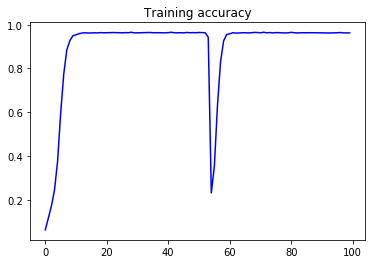

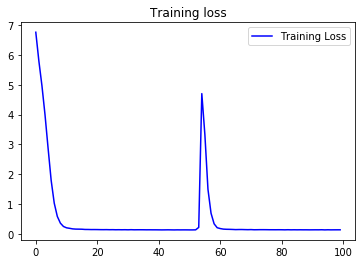

In [28]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

We could set no epochs to 51 without loosing accuracy

In [88]:
seed_text = "I think"
next_words = 100
seed_text

'I think'

Text to sequences and pad

In [89]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

I think saw the best minds of my generation destroyed by madness starving hysterical naked angel came to pierce them with a sword in their with gaunt waitresses in familiar roadside lonely petticoat upliftings especially secret gas station solipsisms of johns hometown alleys too moloch whose name is the mind leaping toward poles of canada paterson illuminating all the motionless world of time between realms of love dream of life a nightmare bodies turned to stone as heavy as big no crime but their skulls their torsos night after night after night streaming rows of love dream tragedy tangiers eluding barns electrified
